In [66]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [67]:
df = pd.read_csv('qdrops.csv', parse_dates=True)

In [68]:
df = df.sort_values(by='drop_id')
df = df.set_index('drop_id')

In [69]:
# df['hour'] = pd.to_datetime(df.date).dt.hour
# df['hour_utc'] = pd.to_datetime(df.date).dt.tz_convert("UTC").dt.hour
# df['time_utc'] = pd.to_datetime(df.date).dt.tz_convert("UTC").dt.time
# df['weekday'] = pd.to_datetime(df.date).dt.dayofweek

df['date'] = pd.to_datetime(df.date)

# # Update: Use fractional hours
# df['hour_utc'] += df.date.dt.minute / 60
# df['hour'] += df.date.dt.minute / 60

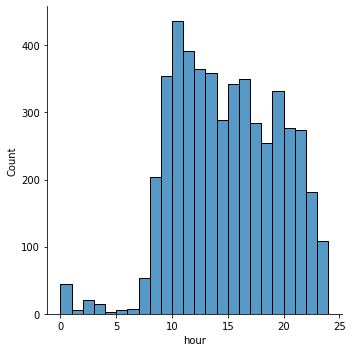

In [70]:
sns.displot(df, x='hour', binwidth=1)

In [21]:
# df['minutes_since_last_drop'] = pd.to_datetime(df.date).diff().dt.total_seconds() / 60
# df['minutes_since_last_drop'] = df.minutes_since_last_drop.replace(0, 0.05)
# df['minutes_since_last_drop_avg'] = df.minutes_since_last_drop.rolling(window=5).mean()
# df['post_length_chars'] = df.body_text.str.len()

In [25]:
posts_within_1_hr = df[df.minutes_since_last_drop <= 60]
posts_within_6_hrs = df[df.minutes_since_last_drop <= 360]
posts_within_30_mins = df[df.minutes_since_last_drop <= 30]

Text(0, 0.5, 'Hour (Pacific)')

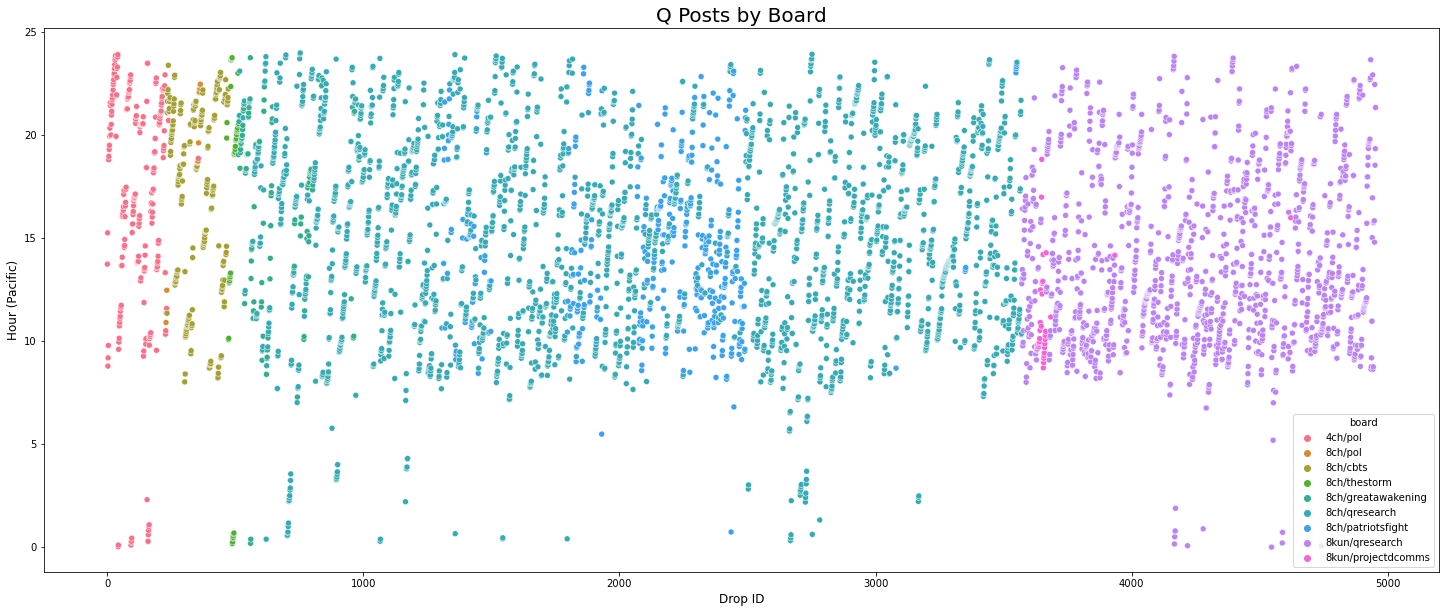

In [26]:
fig = plt.gcf()

# Change seaborn plot size
fig.set_size_inches(25, 10)

sns.scatterplot(data=df, x='drop_id', y='hour', hue='board').set_title('Q Posts by Board', size=20)
plt.xlabel("Drop ID", size=12)
plt.ylabel("Hour (Pacific)", size=12)

In [27]:
# from sklearn.feature_extraction.text import TfidfVectorizer

# tfidf_vect = TfidfVectorizer(max_df=0.8, min_df=2, stop_words='english')
# doc_term_matrix = tfidf_vect.fit_transform(df.body_text.values.astype('U'))

# from sklearn.decomposition import NMF

# nmf = NMF(n_components=8, random_state=42)
# nmf.fit(doc_term_matrix)

# for i,topic in enumerate(nmf.components_):
#     print(f'Top 10 words for topic #{i}:')
#     print([tfidf_vect.get_feature_names()[i] for i in topic.argsort()[-10:][::-1]])
#     print('\n')


# Output of above:

# Top 10 words for topic #0:
# ['status', 'twitter', 'com', 'https', 'realdonaldtrump', 'vip', 'mobile', 'patriot', 'love', 'flagsout']


# Top 10 words for topic #1:
# ['jpg', 'large', '220px', 'pain', 'anons', 'remember', 'remembering', 'enemy', 'reconcile', 'unknown']


# Top 10 words for topic #2:
# ['png', 'clipboardimage', 'delta', 'shot', 'screen', 'coincidence', 'anon', 'realdonaldtrump', 'united', 'large']


# Top 10 words for topic #3:
# ['youtube', 'watch', 'www', 'https', 'com', 'feature', 'youtu', 'g2qixxafxcq', 'politics', 'html']


# Top 10 words for topic #4:
# ['news', 'potus', 'think', 'people', 'did', 'fake', 'public', 'control', 'fbi', 'www']


# Top 10 words for topic #5:
# ['jpeg', 'coincidence', 'coincidences', 'believe', 'ready', 'patriots', 'game', 'image0', 'news', 'hear']


# Top 10 words for topic #6:
# ['wwg1wga', 'stand', 'united', 'status', 'win', 'wrwy', 'twitter', 'qthewakeup', 'stop', 'great']


# Top 10 words for topic #7:
# ['god', 'patriots', 'bless', 'country', 'stand', 'patriot', 'fight', 'thank', 'united', 'love']

## My best guess at labeling the above topics:

- 0: Twitter link
- 1: JPEG
- 2: PNG
- 3: Youtube video
- 4: Conspiratorial
- 5: Coincidences
- 6: Sloganeering
- 7: Patriotism


In [28]:
# topic_values = nmf.transform(doc_term_matrix)
# topics = pd.DataFrame(topic_values)
# topics.columns = ['Twitter link', 'JPEG', 'PNG', 'Other link', 'Conspiratorial', 'Coincidences', 'Sloganeering', 'Patriotism']
# topics['drop_id'] = topics.index + 1
# topics = topics.set_index('drop_id')
# topics=((topics-topics.min())/(topics.max()-topics.min()))

NameError: name 'nmf' is not defined

In [30]:
# df['topic'] = topics.columns[topic_values.argmax(axis=1)]
topic_twitter = df[df.topic == 'Twitter link']
topic_jpeg = df[df.topic == 'JPEG']
topic_png = df[df.topic == 'PNG']
topic_other = df[df.topic == 'Other link']
topic_conspiratorial = df[df.topic == 'Conspiratorial']
topic_coincidences = df[df.topic == 'Coincidences']
topic_sloganeering = df[df.topic == 'Sloganeering']
topic_patriotism = df[df.topic == 'Patriotism']

/home/robert/.local/lib/python3.9/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/home/robert/.local/lib/python3.9/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/home/robert/.local/lib/python3.9/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


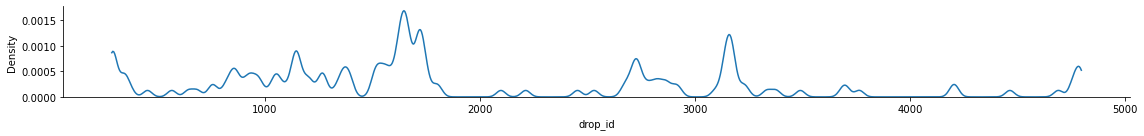

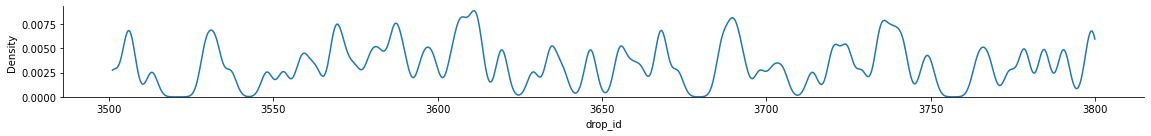

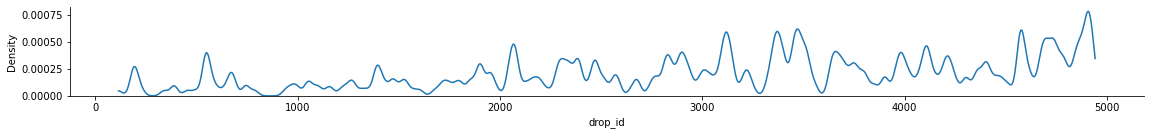

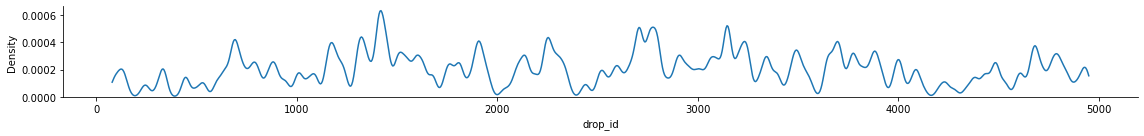

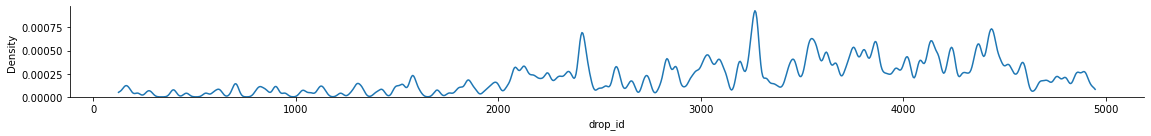

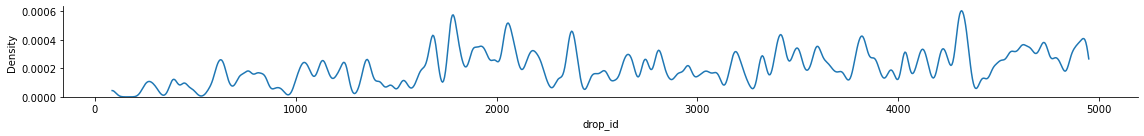

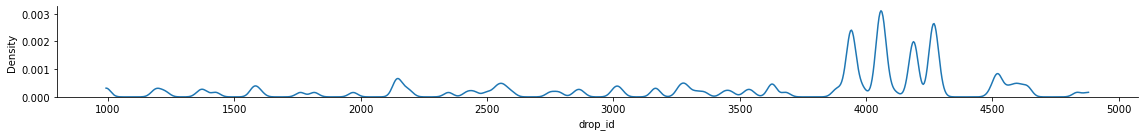

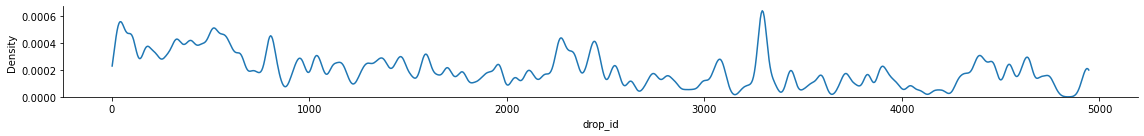

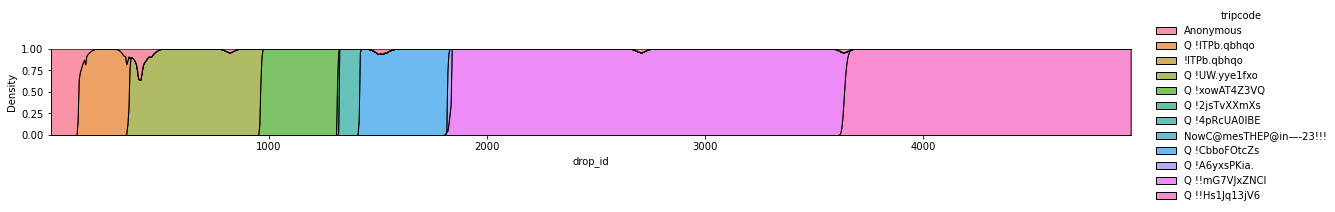

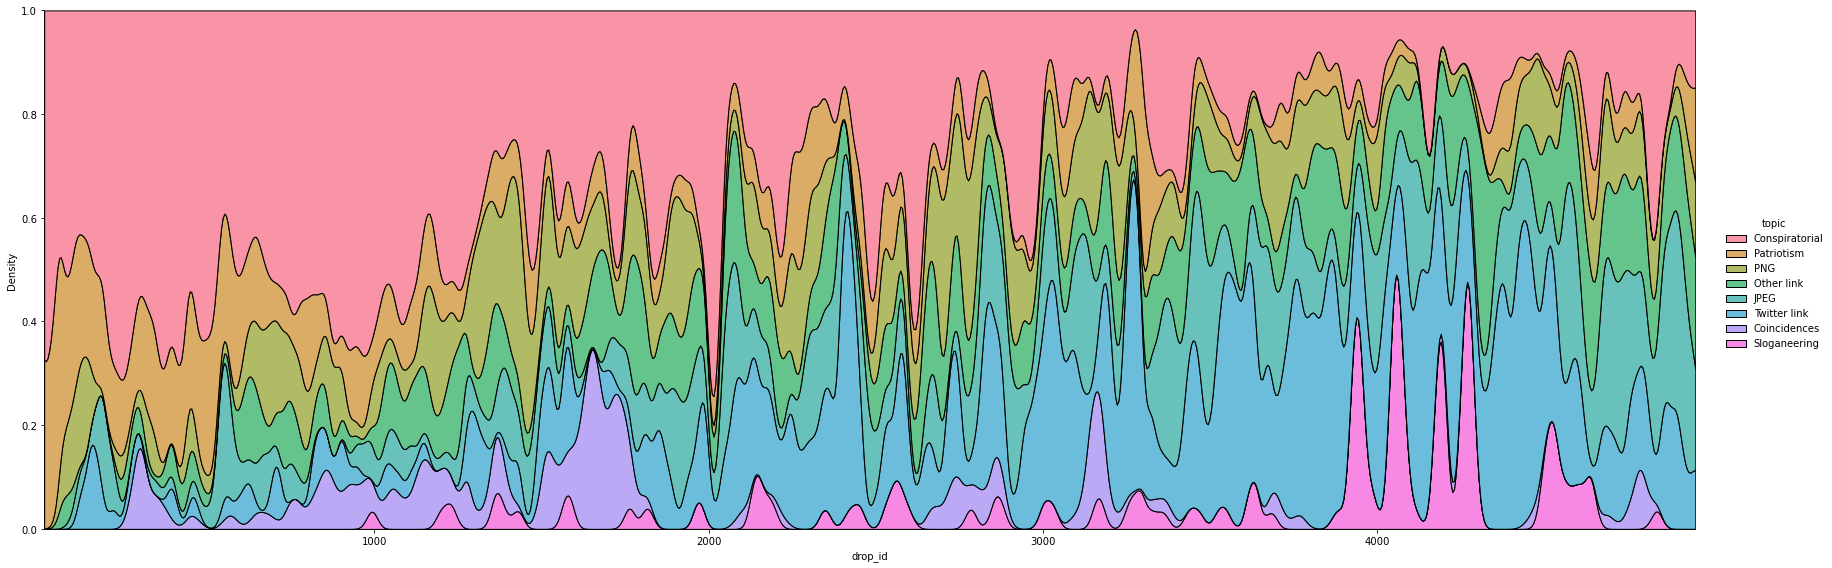

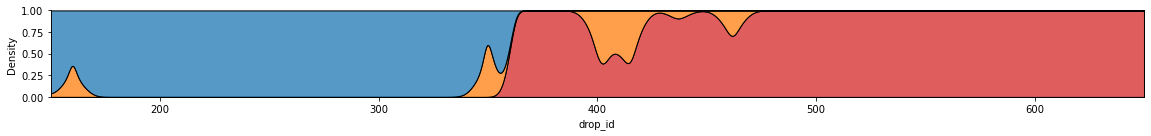

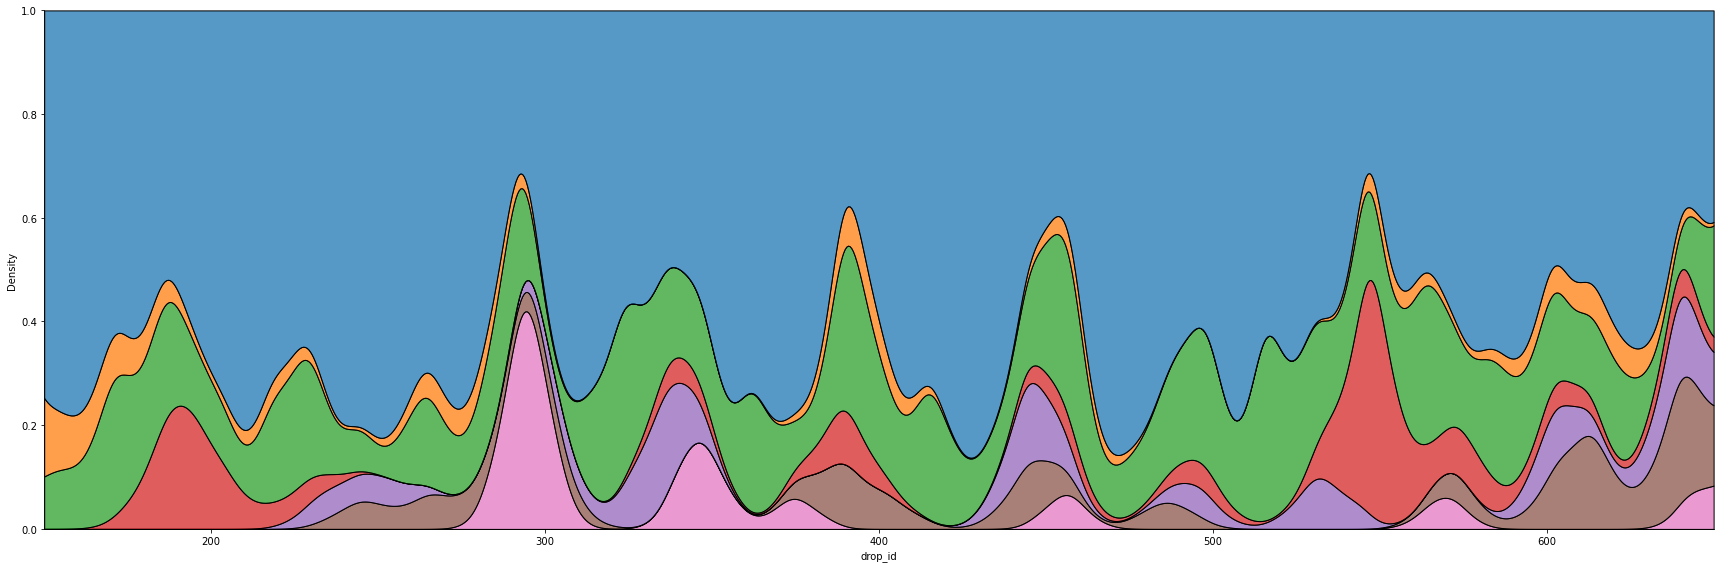

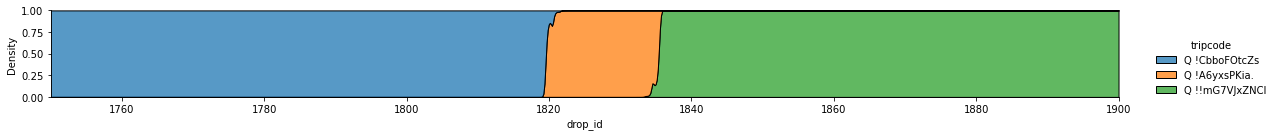

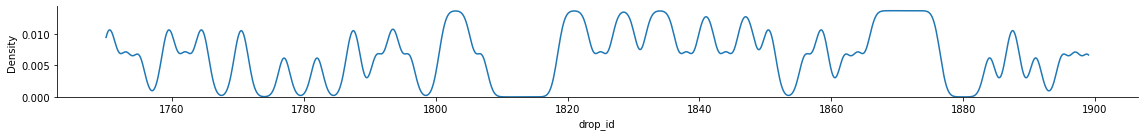

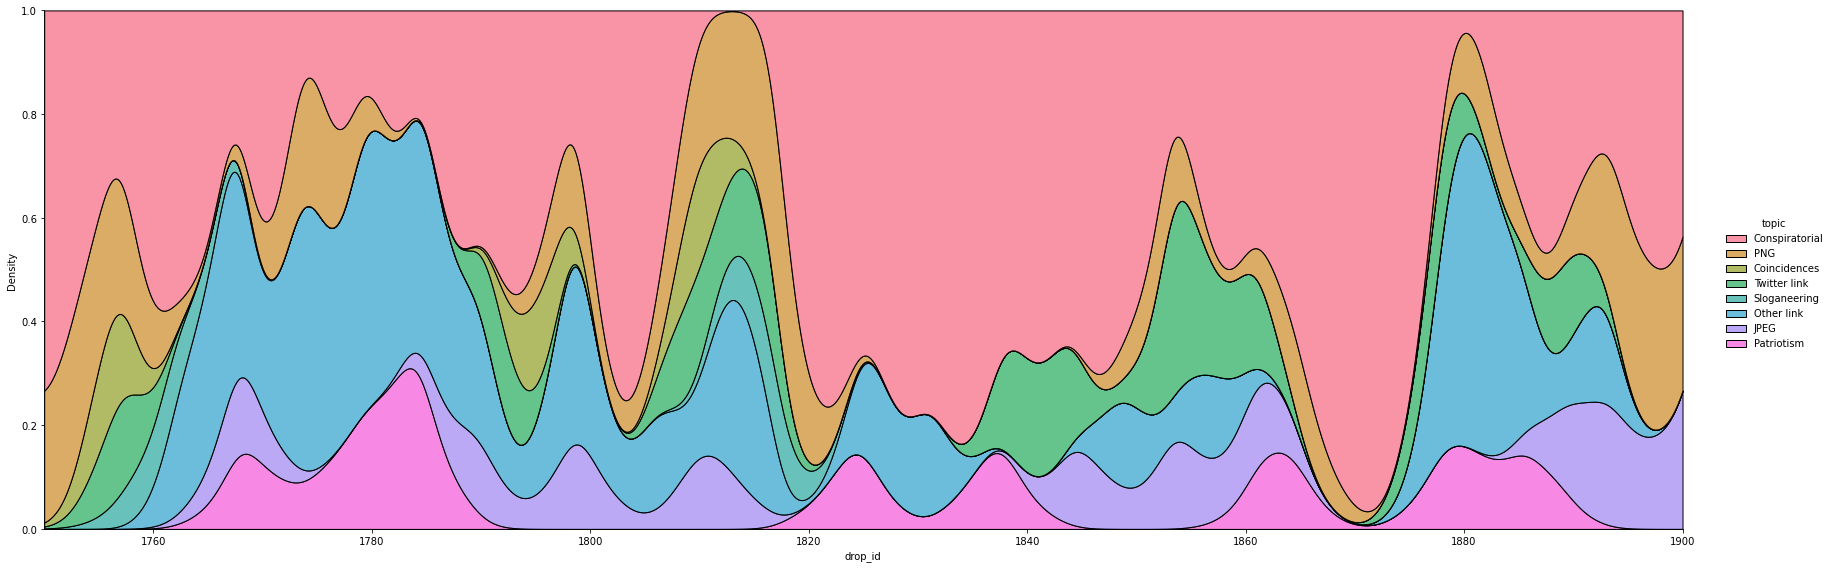

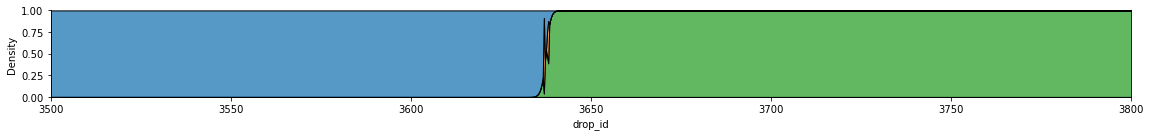

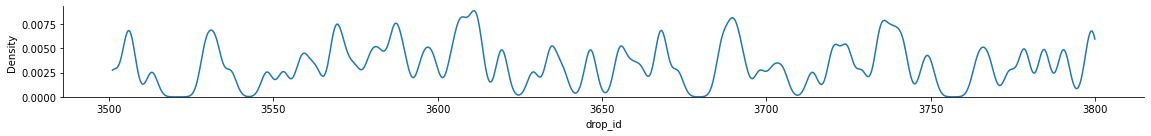

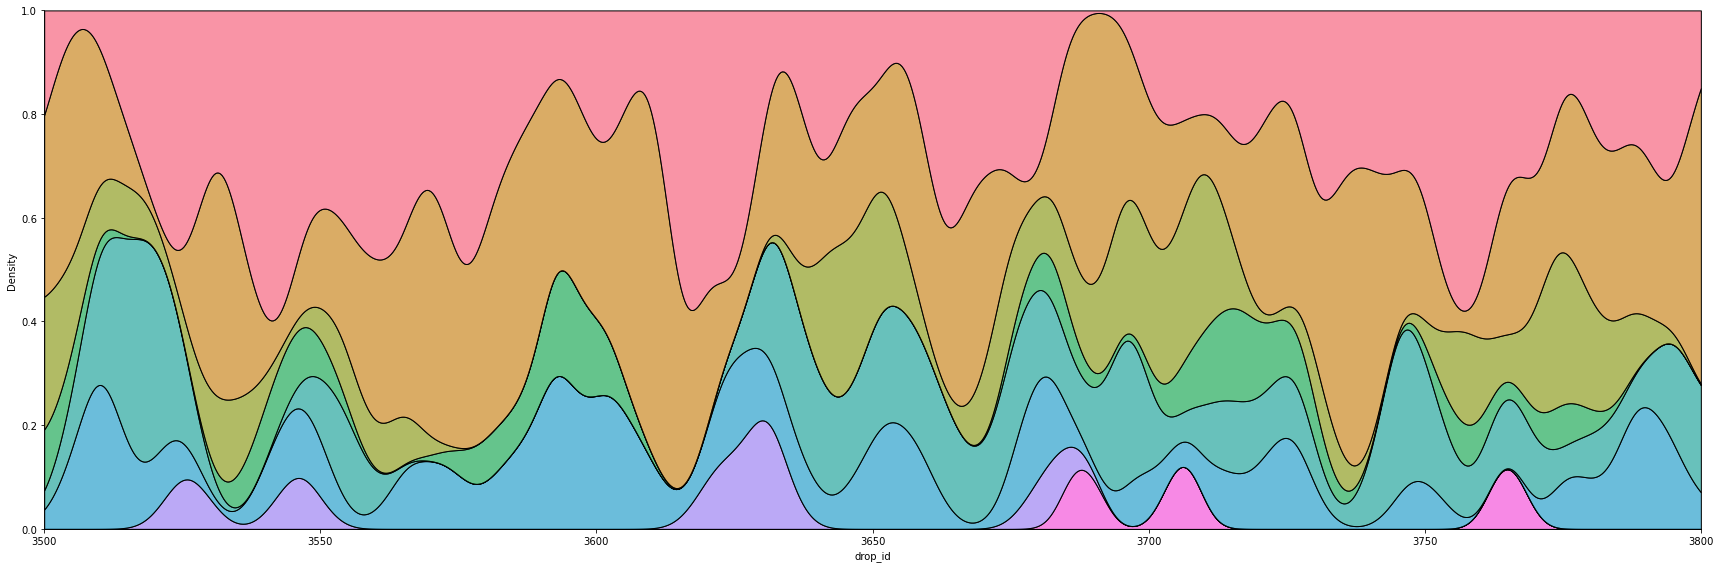

In [114]:
# rolling_avg_topics = topics.rolling(window=150).mean()

sns.displot(topic_coincidences, x='drop_id', hue='topic', kind='kde', height=2, aspect=8, bw_adjust=0.05, gridsize=1000, cut=0, legend=False)
sns.displot(topic_conspiratorial, x='drop_id', hue='topic', kind='kde', height=2, aspect=8, bw_adjust=0.05, gridsize=1000, cut=0, legend=False)
sns.displot(topic_jpeg, x='drop_id', hue='topic', kind='kde', height=2, aspect=8, bw_adjust=0.05, gridsize=1000, cut=0, legend=False)
sns.displot(topic_png, x='drop_id', hue='topic', kind='kde', height=2, aspect=8, bw_adjust=0.05, gridsize=1000, cut=0, legend=False)
sns.displot(topic_twitter, x='drop_id', hue='topic', kind='kde', height=2, aspect=8, bw_adjust=0.05, gridsize=1000, cut=0, legend=False)
sns.displot(topic_other, x='drop_id', hue='topic', kind='kde', height=2, aspect=8, bw_adjust=0.05, gridsize=1000, cut=0, legend=False)
sns.displot(topic_sloganeering, x='drop_id', hue='topic', kind='kde', height=2, aspect=8, bw_adjust=0.05, gridsize=1000, cut=0, legend=False)
sns.displot(topic_patriotism, x='drop_id', hue='topic', kind='kde', height=2, aspect=8, bw_adjust=0.05, gridsize=1000, cut=0, legend=False)

sns.displot(df, x='drop_id', hue='tripcode', multiple='fill', kind='kde', height=2, aspect=8, bw_adjust=0.1, gridsize=1000, cut=0, legend=True)
sns.displot(posts_under_250_chars, x='drop_id', hue='topic', cumulative=False, kind='kde', multiple='fill', height=8, aspect=3, bw_adjust=0.05, gridsize=1000, cut=0, legend=True)

posts_150_to_650 = df[149:650]
sns.displot(posts_150_to_650, x='drop_id', hue='tripcode', multiple='fill', kind='kde', height=2, aspect=8, bw_adjust=0.1, gridsize=1000, cut=0, legend=False)
sns.displot(posts_150_to_650, x='drop_id', hue='topic', kind='kde', multiple='fill', height=8, aspect=3, bw_adjust=0.1, gridsize=1000, cut=0, legend=False)


posts_1750_to_1900 = df[1749:1900]
topic_conspiratorial = posts_1750_to_1900[posts_1750_to_1900.topic == 'Conspiratorial']
sns.displot(posts_1750_to_1900, x='drop_id', hue='tripcode', multiple='fill', kind='kde', height=2, aspect=8, bw_adjust=0.1, gridsize=1000, cut=0, legend=True)
sns.displot(topic_conspiratorial, x='drop_id', hue='topic', kind='kde', height=2, aspect=8, bw_adjust=0.05, gridsize=1000, cut=0, legend=False)
sns.displot(posts_1750_to_1900, x='drop_id', hue='topic', kind='kde', multiple='fill', height=8, aspect=3, bw_adjust=0.1, gridsize=1000, cut=0, legend=True)

posts_3500_to_3800 = df[3499:3800]
topic_conspiratorial = posts_3500_to_3800[posts_3500_to_3800.topic == 'Conspiratorial']
sns.displot(posts_3500_to_3800, x='drop_id', hue='tripcode', multiple='fill', kind='kde', height=2, aspect=8, bw_adjust=0.1, gridsize=1000, cut=0, legend=False)
sns.displot(topic_conspiratorial, x='drop_id', hue='topic', kind='kde', height=2, aspect=8, bw_adjust=0.05, gridsize=1000, cut=0, legend=False)
sns.displot(posts_3500_to_3800, x='drop_id', hue='topic', kind='kde', multiple='fill', height=8, aspect=3, bw_adjust=0.1, gridsize=1000, cut=0, legend=False)

In [33]:
tripcodes = df.tripcode.unique()
total_drops = len(df)

top_8_Qs = []

for tripcode in tripcodes:
    if (len(df[df.tripcode == tripcode]) / total_drops * 100) > 1:
        top_8_Qs.append(tripcode)

for tripcode in top_8_Qs:
    all_posts_by_tripcode = df[df.tripcode == tripcode]
    uppercase_posts = all_posts_by_tripcode[all_posts_by_tripcode.is_uppercase]
    pct_uppercase = len(uppercase_posts) / len(all_posts_by_tripcode)
    print('{0}\t{1:.2%} uppercase'.format(tripcode, pct_uppercase))

Anonymous	1.23% uppercase
Q !ITPb.qbhqo	2.69% uppercase
Q !UW.yye1fxo	6.17% uppercase
Q !xowAT4Z3VQ	3.13% uppercase
Q !4pRcUA0lBE	1.06% uppercase
Q !CbboFOtcZs	1.00% uppercase
Q !!mG7VJxZNCI	3.06% uppercase
Q !!Hs1Jq13jV6	1.90% uppercase


Text(0, 0.5, 'Board')

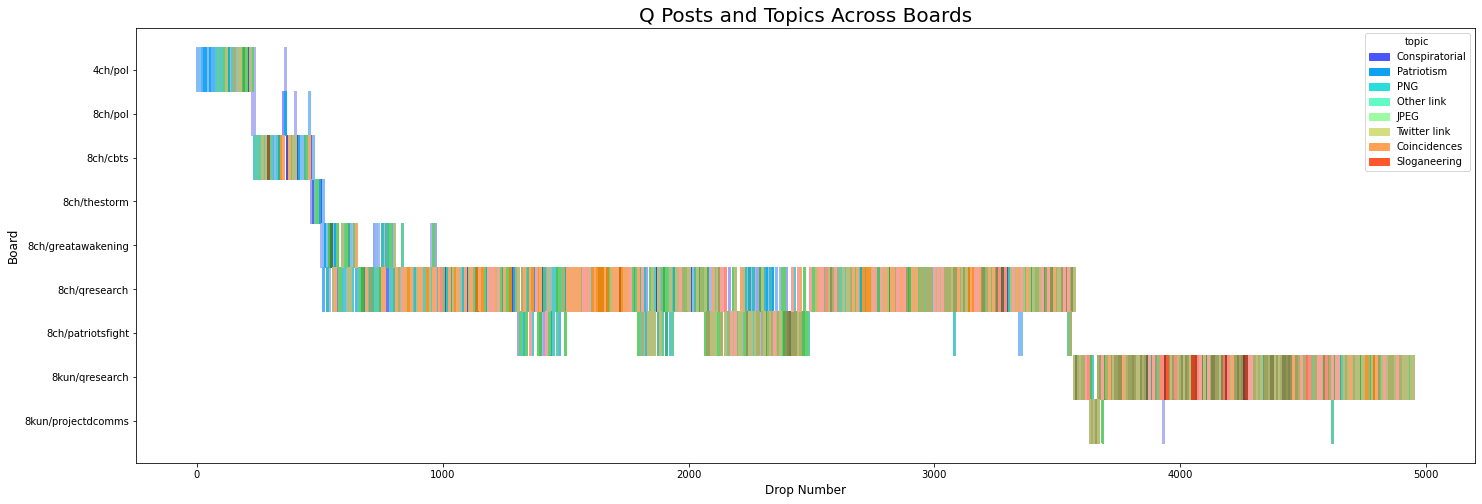

In [124]:
#sns.jointplot(data=df, x='drop_id', y='topic', kind='hist')
sns.color_palette("rainbow", 8)

fig = plt.gcf()
fig.set_size_inches(24, 8)
sns.set_palette("rainbow", 8)
sns.histplot(data=df, x='drop_id', y='board', hue='topic', bins=600).set_title('Q Posts and Topics Across Boards', size=20)

fig.set_size_inches(24, 8)
plt.xlabel("Drop Number", size=12)
plt.ylabel("Board", size=12)



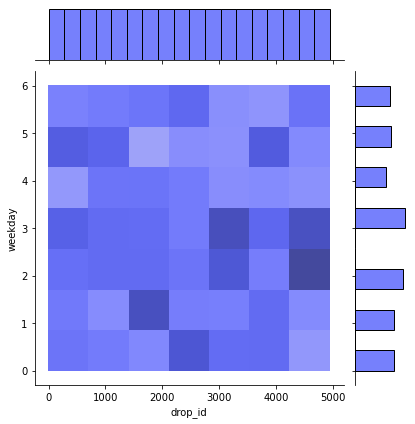

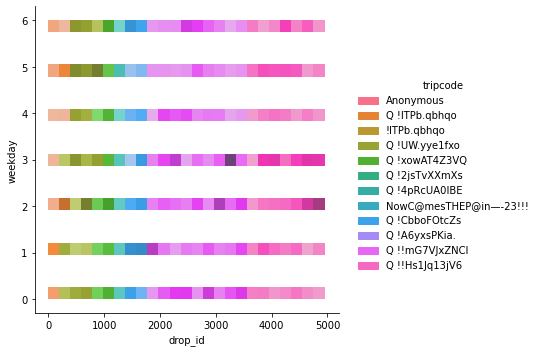

In [35]:
sns.jointplot(data=df, x='drop_id', y='weekday', bins=7, kind='hist')
sns.displot(data=df, x='drop_id', y='weekday', hue='tripcode', bins=25)

In [114]:
q_replies = df[df.is_reply]
q_replies = pd.DataFrame(q_replies)
q_replies

date        tripcode           board  \
drop_id                                                              
1        2017-10-28 13:44:28-07:00       Anonymous         4ch/pol   
28       2017-10-31 22:59:01-07:00       Anonymous         4ch/pol   
51       2017-11-02 11:12:06-07:00       Anonymous         4ch/pol   
58       2017-11-02 13:40:27-07:00       Anonymous         4ch/pol   
66       2017-11-02 17:19:28-07:00       Anonymous         4ch/pol   
...                            ...             ...             ...   
4877     2020-10-15 14:33:19-07:00  Q !!Hs1Jq13jV6  8kun/qresearch   
4878     2020-10-15 14:54:41-07:00  Q !!Hs1Jq13jV6  8kun/qresearch   
4879     2020-10-15 14:56:51-07:00  Q !!Hs1Jq13jV6  8kun/qresearch   
4910     2020-10-21 11:47:34-07:00  Q !!Hs1Jq13jV6  8kun/qresearch   
4940     2020-10-22 16:57:32-07:00  Q !!Hs1Jq13jV6  8kun/qresearch   

             thread      time       hour   hour_utc  time_utc  \
drop_id                                                         
1               NaN  13:44:28  13.733333  20.733333  20:44:28   
28              NaN  22:59:01  22.983333   5.983333  05:59:01   
51              NaN  11:12:06  11.200000  18.200000  18:12:06   
58              NaN  13:40:27  13.666667  20.666667  20:40:27   
66              NaN  17:19:28  17.316667   0.316667  00:19:28   
...             ...       ...        ...        ...       ...   
4877     11090367.0  14:33:19  14.550000  21.550000  21:33:19   
4878     11090814.0  14:54:41  14.900000  21.900000  21:54:41   
4879     11090880.0  14:56:51  14.933333  21.933333  21:56:51   
4910     11192736.0  11:47:34  11.783333  18.783333  18:47:34   
4940     11223312.0  16:57:32  16.950000  23.950000  23:57:32   

         minutes_since_last_drop  minutes_since_last_drop_avg  \
drop_id                                                         
1                            NaN                          NaN   
28                      2.916667                     9.430000   
51                      5.133333                    14.956667   
58                      0.816667                    24.806667   
66                     12.166667                    14.313333   
...                          ...                          ...   
4877                    0.616667                    62.200000   
4878                   21.366667                    61.183333   
4879                    2.166667                    45.016667   
4910                    3.650000                     3.346667   
4940                  116.116667                    98.486667   

         post_length_chars  weekday  is_uppercase           topic  is_reply  \
drop_id                                                                       
1                      521        5         False  Conspiratorial      True   
28                    1896        1         False  Conspiratorial      True   
51                    1746        3         False      Patriotism      True   
58                    2013        3         False  Conspiratorial      True   
66                     487        3         False  Conspiratorial      True   
...                    ...      ...           ...             ...       ...   
4877                    24        3         False            JPEG      True   
4878                    91        3         False            JPEG      True   
4879                   505        3         False             PNG      True   
4910                   164        2         False  Conspiratorial      True   
4940                   214        3         False             PNG      True   

                  platform  
drop_id                     
1               [4ch, pol]  
28              [4ch, pol]  
51              [4ch, pol]  
58              [4ch, pol]  
66              [4ch, pol]  
...                    ...  
4877     [8kun, qresearch]  
4878     [8kun, qresearch]  
4879     [8kun, qresearch]  
4910     [8kun, qresearch]  
4940     [8kun, qresearch]  

[1626 rows x 16 colum

In [62]:
from datetime import datetime
import pytz

tz = pytz.timezone('America/Los_Angeles')

daylight_savings_1 = df[df.date >= datetime.fromisoformat('2019-02-10').astimezone(tz)]
daylight_savings_1 = daylight_savings_1[daylight_savings_1.date <= datetime.fromisoformat('2019-04-10').astimezone(tz)]

In [113]:
plt.figure(figsize=(6,6))
sns.histplot(data=q_replies, x='date', y='hour', bins=24).set_title('Q Replies', size=20)
plt.xticks(rotation=45)
plt.xlabel("Date", size=12)
plt.ylabel("Hour", size=12)
plt.show()

q_replies['minutes_since_last_reply'] = pd.to_datetime(q_replies.date, utc=True).diff().dt.total_seconds() / 60
q_replies_with_30_minutes = q_replies[q_replies['minutes_since_last_reply'] <= 5]

plt.figure(figsize=(7,6))
sns.histplot(data=q_replies_with_30_minutes, x='date', y='hour', bins=24, cbar=True).set_title('Q Replies within 5 minutes', size=20)
plt.xticks(rotation=45)
plt.xlabel("Date", size=12)
plt.ylabel("Hour", size=12)
plt.show()

plt.figure(figsize=(7,6))
sns.histplot(data=daylight_savings_1, x='date', y='hour_utc', bins=24, cbar=True).set_title('Q Posts', size=20)
plt.xticks(rotation=45)
plt.xlabel("Date", size=12)
plt.ylabel("Hour (UTC)", size=12)
plt.show()

fig = plt.gcf()

# Change seaborn plot size
fig.set_size_inches(12, 12)
plt.xticks(rotation=45)

sns.scatterplot(data=daylight_savings_1, x='date', y='hour_utc').set_title('Q Posts, 2/10 2019 through 4/10 2019', size=20)
plt.xlabel("Date", size=12)
plt.ylabel("Hour (UTC)", size=12)

fig = plt.gcf()

# Change seaborn plot size
fig.set_size_inches(24, 16)
plt.xticks(rotation=45)

sns.scatterplot(data=df, x='date', y='hour_utc', hue='tripcode').set_title('Q Posts and Daylight Savings Time', size=20)
plt.xlabel("Date", size=12)
plt.ylabel("Hour (UTC)", size=12)

dst_dates = [
    datetime.fromisoformat('2017-11-05'),
    datetime.fromisoformat('2018-03-11'),
    datetime.fromisoformat('2018-11-04'),
    datetime.fromisoformat('2019-03-10'),
    datetime.fromisoformat('2019-11-03'),
    datetime.fromisoformat('2020-03-08'),
    datetime.fromisoformat('2020-11-01')
]

color = 'red'

from datetime import timedelta

for dst in dst_dates:
    plt.axvline(x=dst, ls=':', color=color)
    plt.text(x = dst + timedelta(days=3), y = -0.5, s = dst.strftime("%b %d, %Y"))
    if color == 'red':
        color = 'blue'
    else:
        color = 'red'
    

NameError: name 'q_replies' is not defined

<Figure size 432x432 with 0 Axes>

In [51]:
# First drop on 8ch: #230
print(df[df.board.str.startswith('8ch')].iloc[0])

# First drop on 8kun: #3571
print(df[df.board.str.startswith('8kun')].iloc[0])

# First drop w/ tripcode !Cbb... #1417
print(df[df.tripcode.str.startswith('Q !Cbb')].iloc[0])

date                           2017-11-25 10:54:45-08:00
tripcode                                   Q !ITPb.qbhqo
board                                            8ch/pol
time                                            10:54:45
hour                                                10.9
hour_utc                                            18.9
time_utc                                        18:54:45
minutes_since_last_drop                          23.9667
minutes_since_last_drop_avg                      438.313
post_length_chars                                     67
weekday                                                5
is_uppercase                                       False
topic                                     Conspiratorial
is_reply                                           False
Name: 230, dtype: object
date                           2019-11-02 12:47:25-07:00
tripcode                                  Q !!mG7VJxZNCI
board                                     8kun/qresearch
time  

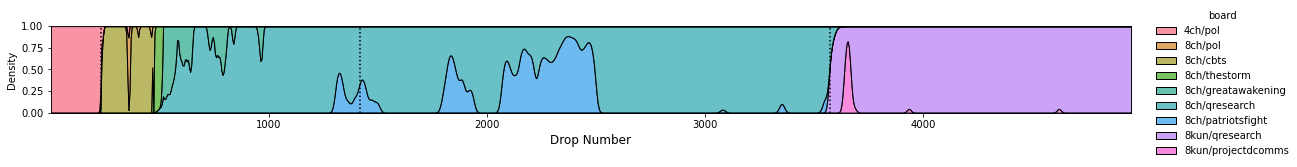

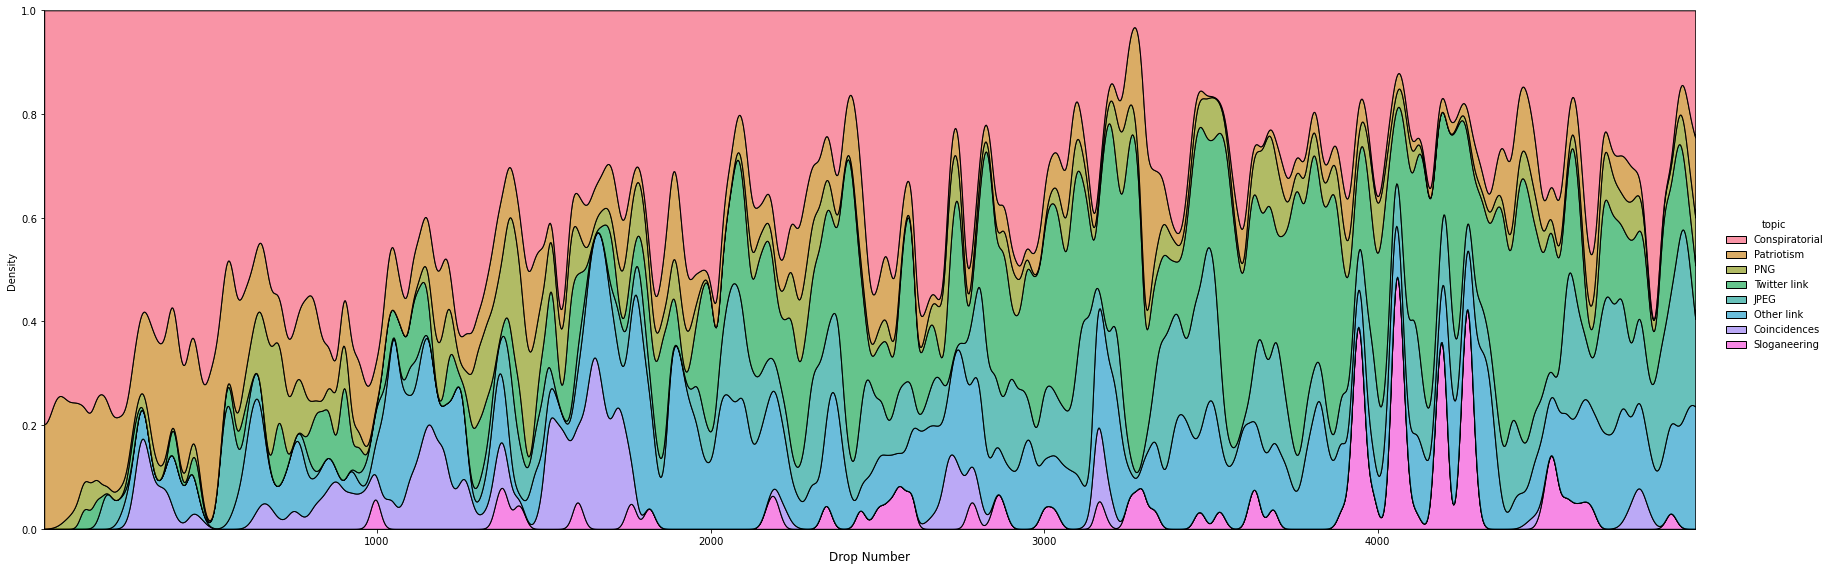

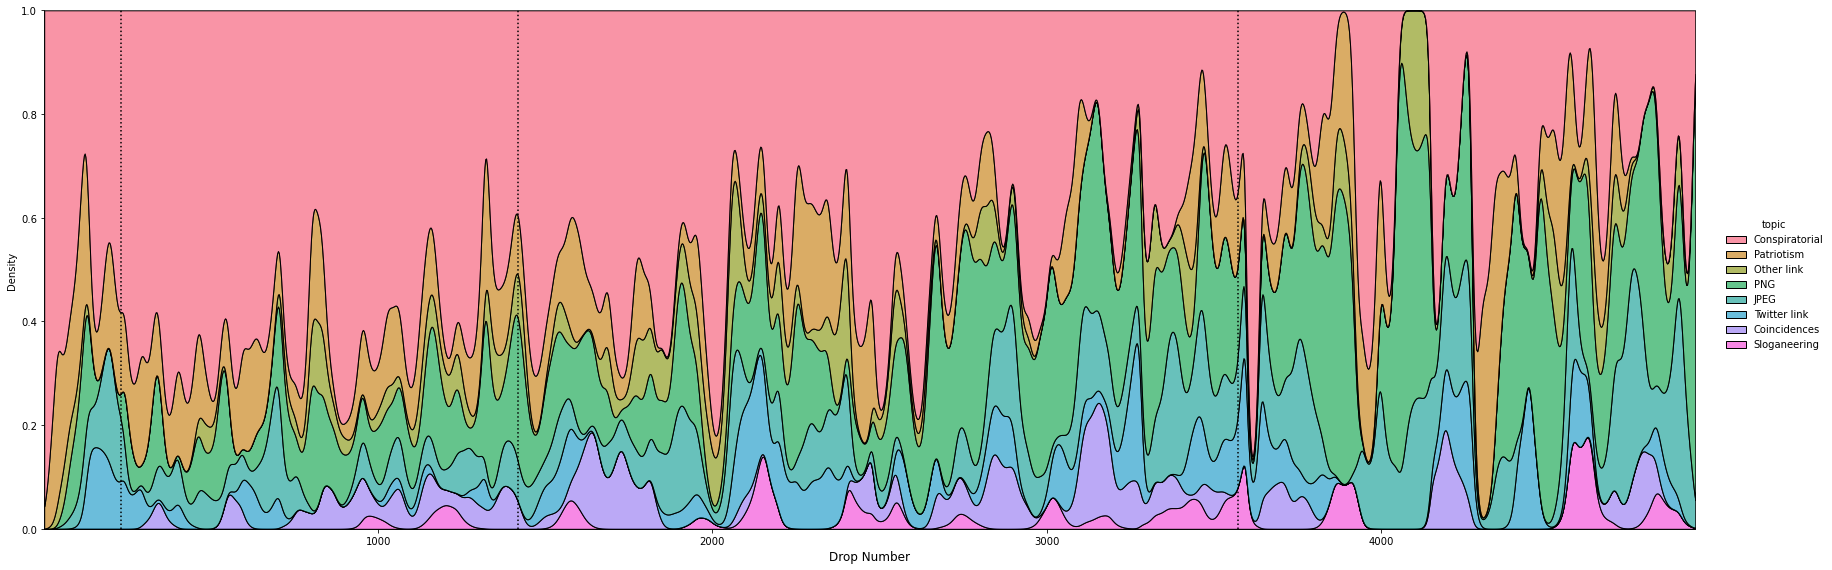

In [122]:
sns.set_palette('tab10', 7)

sns.displot(df, x='drop_id', hue='board', multiple='fill', kind='kde', height=2, aspect=8, bw_adjust=0.1, gridsize=1000, cut=0, legend=True)
plt.xlabel("Drop Number", size=12)

plt.axvline(x=230, ls=':', color='black')
plt.axvline(x=1417, ls=':', color='black')
plt.axvline(x=3571, ls=':', color='black')

non_replies = df[df.is_reply == False]

sns.displot(non_replies, x='drop_id', hue='topic', cumulative=False, kind='kde', multiple='fill', height=8, aspect=3, bw_adjust=0.05, gridsize=2000, cut=0, legend=True)
plt.xlabel("Drop Number", size=12)

sns.displot(q_replies, x='drop_id', hue='topic', cumulative=False, kind='kde', multiple='fill', height=8, aspect=3, bw_adjust=0.05, gridsize=2000, cut=0, legend=True)
plt.xlabel("Drop Number", size=12)

plt.axvline(x=230, ls=':', color='black')
plt.axvline(x=1417, ls=':', color='black')
plt.axvline(x=3571, ls=':', color='black')

ValueError: `stat` must be one of ['count', 'density', 'probability', 'frequency'], but drop_id was passed.`

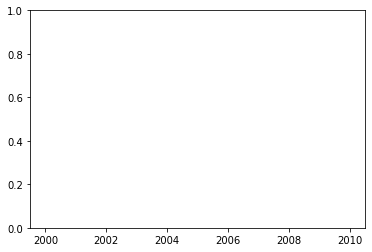

In [9]:
sns.histplot(df, stat="drop_id", multiple="stack", x='date', kde=False, hue='topic')




<ipython-input-29-9680a6600840>:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  posts_3250_to_3750 = df[df.drop_id >= 3250][df.drop_id <= 3750]


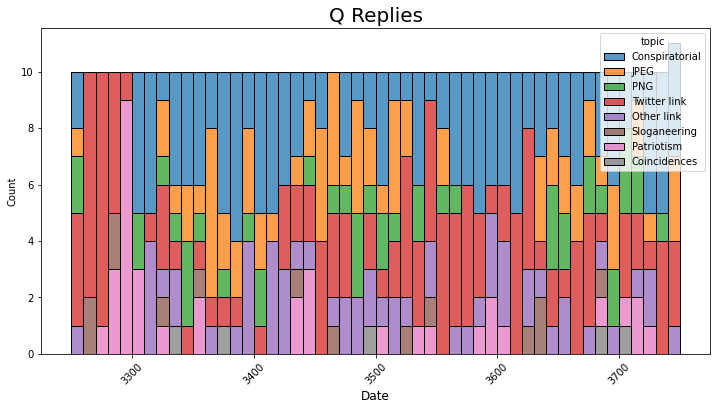

In [29]:
plt.figure(figsize=(12,6))
posts_3250_to_3750 = df[df.drop_id >= 3250][df.drop_id <= 3750]
sns.histplot(data=posts_3250_to_3750, x='drop_id', hue='topic', multiple='stack', bins=50).set_title('Q Replies', size=20)
plt.xticks(rotation=45)
plt.xlabel("Date", size=12)
plt.show()

In [ ]:
q_posts = pd.read

In [31]:
q_posts = pd.read_csv('qposts.csv', parse_dates=True)

In [32]:
q_posts['board'] = q_posts['board'].str.replace('.*\/[a-z]*', '', regex=True)

In [34]:
q_posts['thread'] = q_posts['board']

In [48]:
q_posts = q_posts.sort_values(by='drop_id')
q_posts = q_posts.set_index('drop_id')

KeyError: "None of ['drop_id'] are in the columns"

In [53]:
q_posts.to_csv('test.csv')

In [52]:
q_posts = q_posts.drop(columns=['body_text'])

In [57]:
condition = df.drop_id >= 250
condition &= df.drop_id <= 500

drops_250_to_500 = df[condition]

In [58]:
drops_250_to_500

drop_id                       date       tripcode         board  thread  \
249      250  2017-12-04 19:45:41-08:00  Q !ITPb.qbhqo      8ch/cbts     NaN   
250      251  2017-12-04 19:50:10-08:00  Q !ITPb.qbhqo      8ch/cbts     NaN   
251      252  2017-12-04 20:01:17-08:00  Q !ITPb.qbhqo      8ch/cbts     NaN   
252      253  2017-12-04 20:07:17-08:00  Q !ITPb.qbhqo      8ch/cbts     NaN   
253      254  2017-12-04 20:12:59-08:00  Q !ITPb.qbhqo      8ch/cbts     NaN   
..       ...                        ...            ...           ...     ...   
495      496  2018-01-07 19:03:47-08:00  Q !UW.yye1fxo  8ch/thestorm     NaN   
496      497  2018-01-07 19:05:50-08:00  Q !UW.yye1fxo  8ch/thestorm     NaN   
497      498  2018-01-07 19:09:13-08:00  Q !UW.yye1fxo  8ch/thestorm     NaN   
498      499  2018-01-07 19:10:25-08:00  Q !UW.yye1fxo  8ch/thestorm     NaN   
499      500  2018-01-07 19:18:45-08:00  Q !UW.yye1fxo  8ch/thestorm     NaN   

         time       hour  hour_utc  time_utc  minutes_since_last_drop  \
249  19:45:41  19.750000  3.750000  03:45:41                 6.833333   
250  19:50:10  19.833333  3.833333  03:50:10                 4.483333   
251  20:01:17  20.016667  4.016667  04:01:17                11.116667   
252  20:07:17  20.116667  4.116667  04:07:17                 6.000000   
253  20:12:59  20.200000  4.200000  04:12:59                 5.700000   
..        ...        ...       ...       ...                      ...   
495  19:03:47  19.050000  3.050000  03:03:47              1102.100000   
496  19:05:50  19.083333  3.083333  03:05:50                 2.050000   
497  19:09:13  19.150000  3.150000  03:09:13                 3.383333   
498  19:10:25  19.166667  3.166667  03:10:25                 1.200000   
499  19:18:45  19.300000  3.300000  03:18:45                 8.333333   

     minutes_since_last_drop_avg  post_length_chars  weekday  is_uppercase  \
249                  1127.766667                 99        0         False   
250                  1128.090000                163        0         False   
251                    12.033333                188        0         False   
252                    10.886667                 84        0         False   
253                     6.826667                168        0         False   
..                           ...                ...      ...           ...   
495                   223.456667                 68        6         False   
496                   223.520000                 29        6         False   
497                   223.093333                 36        6          True   
498                   222.130000                125        6         False   
499                   223.413333                135        6         False   

              topic  is_reply  
249  Conspiratorial     False  
250  Conspiratorial     False  
251  Conspiratorial     False  
252             PNG      True  
253  Conspiratorial      True  
..              ...       ...  
495            JPEG      True  
496      Patriotism     False  
497  Conspiratorial     False  
498  Conspiratorial      True  
499      Patriotism     False  

[251 rows x 16 columns]

Text(0, 0.5, 'Hour (Pacific)')

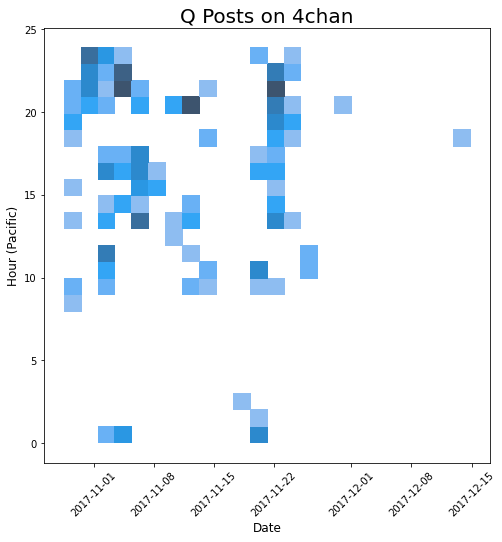

In [81]:
fch_posts = df[df.board.str.startswith('4ch')]

fig = plt.gcf()
fig.set_size_inches(8, 8)
plt.xticks(rotation=45)

sns.histplot(data=fch_posts, x='date', y='hour', bins=24).set_title('Q Posts on 4chan', size=20)
plt.xlabel("Date", size=12)
plt.ylabel("Hour (Pacific)", size=12)

<AxesSubplot:xlabel='weekday', ylabel='hour'>

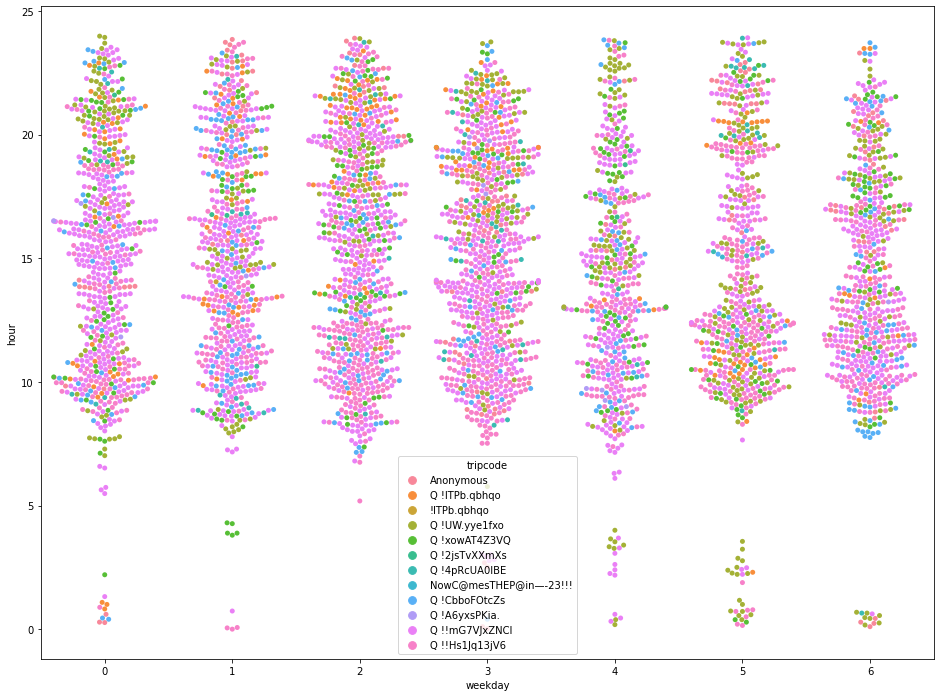

In [93]:
# weekdays = df.replace({0: 'Monday', 1: 'Tuesday', 2: 'Wednesday', 3: 'Thursday', 4: 'Friday', 5: 'Saturday', 6: 'Sunday'})
fig = plt.gcf()
fig.set_size_inches(16, 12)
sns.swarmplot(x="weekday", y="hour", data=df, hue="tripcode")



In [129]:
df['platform'] = df.board.str.split('/', expand=True)
df.platform

drop_id
1        4ch
2        4ch
3        4ch
4        4ch
5        4ch
        ... 
4948    8kun
4949    8kun
4950    8kun
4951    8kun
4952    8kun
Name: platform, Length: 4952, dtype: object

/home/robert/.local/lib/python3.9/site-packages/seaborn/axisgrid.py:643: UserWarning: Using the swarmplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/home/robert/.local/lib/python3.9/site-packages/seaborn/categorical.py:1296: UserWarning: 29.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/robert/.local/lib/python3.9/site-packages/seaborn/categorical.py:1296: UserWarning: 29.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/robert/.local/lib/python3.9/site-packages/seaborn/categorical.py:1296: UserWarning: 34.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/robert/.local/lib/python3.9/site-packages/seaborn/categorical.py:1296: UserWarning: 38.8% of the poi

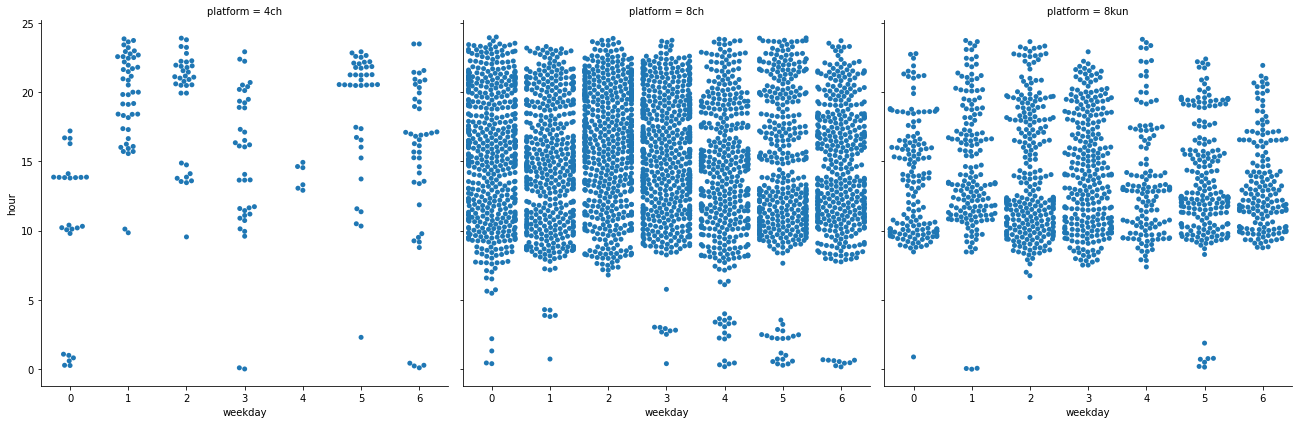

In [126]:
g = sns.FacetGrid(df, col="platform", col_wrap=4, height=6)
g.map(sns.swarmplot, "weekday", "hour")

In [115]:
len(q_replies)

1626

In [116]:
len(df)

4952